In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
train_dataset = pd.read_csv('C:/Users/snirt/Desktop/Data & ML/Projects/house-prices-advanced-regression-techniques/train.csv')
test_dataset = pd.read_csv('C:/Users/snirt/Desktop/Data & ML/Projects/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train_dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Splitting and removing columns

In [4]:
X_train = train_dataset.iloc[:, :-1]
y_train = train_dataset.iloc[:, -1]

X_train = X_train.dropna(axis=1)
test_dataset = test_dataset.dropna(axis=1)


remove_list_1 = np.setdiff1d(X_train.columns,test_dataset.columns)
remove_list_2 = np.setdiff1d(test_dataset.columns,X_train.columns)

X_train.drop(remove_list_1, axis =1, inplace = True)
test_dataset.drop(remove_list_2, axis =1, inplace = True)

X_train.drop('Id', axis =1, inplace = True)
test_dataset.drop('Id', axis =1, inplace = True)

len(test_dataset.columns), len(X_train.columns)

(45, 45)

## Labeling categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def label_train_set(train_set, test_set):
    numeric = ['int64', 'float64','long,','complex64']
    global to_encoed
    to_encoed = []
    for column in train_set.columns:
        if (train_set[column].dtype) not in numeric:
                train_set[column] = np.array(le.fit_transform(train_set[column]))
                test_set[column] = np.array(le.transform(test_set[column]))
                to_encoed.append(column)

    return(to_encoed)
    
label_train_set(X_train,test_dataset)

X_train.dtypes

MSSubClass       int64
LotArea          int64
Street           int32
LotShape         int32
LandContour      int32
LotConfig        int32
LandSlope        int32
Neighborhood     int32
Condition1       int32
Condition2       int32
BldgType         int32
HouseStyle       int32
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle        int32
RoofMatl         int32
ExterQual        int32
ExterCond        int32
Foundation       int32
Heating          int32
HeatingQC        int32
CentralAir       int32
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
PavedDrive       int32
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold     

In [6]:
to_encoed

['Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'PavedDrive',
 'SaleCondition']

In [7]:
X_train.head(5)

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,60,8450,1,3,3,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,4
1,20,9600,1,3,3,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,4
2,60,11250,1,0,3,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,4
3,70,9550,1,0,3,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,0
4,60,14260,1,0,3,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,4


## Encoding categorical data and feature Scaling

In [8]:
X_train.shape, y_train.shape

((1460, 45), (1460,))

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split 


# Create a column transformer
ct = make_column_transformer((MinMaxScaler(),to_encoed),
                             (OneHotEncoder(handle_unknown= 'ignore'), to_encoed)
                            )


# Build our train and test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

# Fit the column transformer to our traning data


# Transform traning and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.fit_transform(X_train)
X_test_normal = ct.transform(X_test)

In [10]:
X_train.shape, y_train.shape

((1168, 45), (1168,))

In [11]:
X_train_normal = tf.convert_to_tensor(X_train_normal.toarray())
X_test_normal =  tf.convert_to_tensor(X_test_normal.toarray())

X_train_normal.shape, y_train.shape

(TensorShape([1168, 143]), (1168,))

In [12]:
y_test.shape, y_train.shape

((292,), (1168,))

In [13]:
tf.convert_to_tensor(y_train)

<tf.Tensor: shape=(1168,), dtype=int64, numpy=array([145000, 178000,  85000, ..., 115000, 189950, 174000], dtype=int64)>

In [14]:
X_train_normal.shape, y_train.shape, X_test_normal.shape , tf.constant([y_test]).shape

(TensorShape([1168, 143]),
 (1168,),
 TensorShape([292, 143]),
 TensorShape([1, 292]))

## Applying LDA

In [15]:
y_train = tf.squeeze(y_train)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 10)
X_train_normal = lda.fit_transform(X_train_normal,y_train)
X_test_normal = lda.transform(X_test_normal)

In [18]:
from tensorflow.python.ops.init_ops_v2 import Initializer

# Set random seed
tf.random.set_seed(42)

# Creating a model 
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(6, activation = 'relu'),
                                tf.keras.layers.Dense(6, activation = 'relu'),
                                tf.keras.layers.Dense(1)
                             ])

# Compiling the model 

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
              metrics = ['mae'])
# Fit the model

history = model_1.fit(X_train_normal,tf.squeeze(y_train), epochs = 100)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 181440.8281 - mae: 181440.8281
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 181440.5625 - mae: 181440.5625
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 181440.3438 - mae: 181440.3438
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 181440.0625 - mae: 181440.0625
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 181439.7188 - mae: 181439.7188
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 181439.3750 - mae: 181439.3750
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 181438.9844 - mae: 181438.9844
Epoch 8/100
37/37 [==============================] - 0s 1ms/step - loss: 181438.5000 - mae: 181438.5000
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 181437.9062 - mae: 181437.9062
Epoch 10/100
37/37 [==============================] - 0s 1ms/ste

37/37 [==============================] - 0s 1ms/step - loss: 28806.5820 - mae: 28806.5820
Epoch 81/100
37/37 [==============================] - 0s 1ms/step - loss: 28839.7598 - mae: 28839.7598
Epoch 82/100
37/37 [==============================] - 0s 1ms/step - loss: 28569.3086 - mae: 28569.3086
Epoch 83/100
37/37 [==============================] - 0s 1ms/step - loss: 28654.0176 - mae: 28654.0176
Epoch 84/100
37/37 [==============================] - 0s 2ms/step - loss: 28809.6953 - mae: 28809.6953
Epoch 85/100
37/37 [==============================] - 0s 2ms/step - loss: 28577.7090 - mae: 28577.7090
Epoch 86/100
37/37 [==============================] - 0s 1ms/step - loss: 29229.1191 - mae: 29229.1191
Epoch 87/100
37/37 [==============================] - 0s 2ms/step - loss: 28604.3223 - mae: 28604.3223
Epoch 88/100
37/37 [==============================] - 0s 1ms/step - loss: 28610.1504 - mae: 28610.1504
Epoch 89/100
37/37 [==============================] - 0s 1ms/step - loss: 28874.8047 -

In [20]:
y_test = y_test.to_numpy()

In [21]:
y_pred = model_1.predict(X_test_normal)
type(y_pred),type(X_test_normal),type(y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

10/10 [==============================] - 0s 2ms/step
[[128360.90625   154500.       ]
 [273896.75      325000.       ]
 [115286.1171875 115000.       ]
 [128531.8125    159000.       ]
 [243310.921875  315500.       ]
 [103758.6640625  75500.       ]
 [199184.796875  311500.       ]
 [152973.40625   146000.       ]
 [ 97684.65625    84500.       ]
 [133575.921875  135500.       ]
 [129077.734375  145000.       ]
 [131815.4375    130000.       ]
 [156639.1875     81000.       ]
 [267995.6875    214000.       ]
 [159775.        181000.       ]
 [130201.375     134500.       ]
 [203531.390625  183500.       ]
 [136872.984375  135000.       ]
 [113470.6875    118400.       ]
 [190535.90625   226000.       ]
 [135210.546875  155000.       ]
 [211470.953125  210000.       ]
 [198321.0625    173500.       ]
 [139992.046875  129000.       ]
 [190535.90625   192000.       ]
 [148171.109375  153900.       ]
 [212884.21875   181134.       ]
 [135656.46875   141000.       ]
 [175881.25      181000

In [22]:
model_1.evaluate(X_test_normal, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 34416.6953 - mae: 34416.6953


[34416.6953125, 34416.6953125]

Text(0.5, 0, 'epoches')

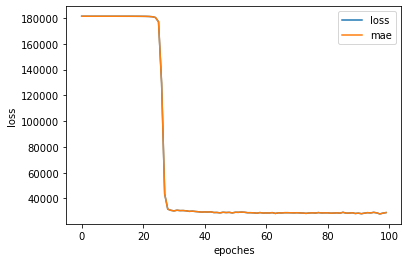

In [23]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoches')

## Model 2

In [24]:
from tensorflow.python.ops.init_ops_v2 import Initializer

# Set random seed
tf.random.set_seed(42)

# Creating a model 
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(6, activation = 'relu'),
                                tf.keras.layers.Dense(6, activation = 'relu'),
                                tf.keras.layers.Dense(1)
                             ])

# Compiling the model 

model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
              metrics = ['mae'])
# Fit the model

history = model_2.fit(X_train_normal,tf.squeeze(y_train), epochs = 100)

Epoch 1/100
37/37 [==============================] - 1s 1ms/step - loss: 181432.9844 - mae: 181432.9844
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 181396.8281 - mae: 181396.8281
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 181319.4688 - mae: 181319.4688
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 181189.0625 - mae: 181189.0625
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 180994.8125 - mae: 180994.8125
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 180719.1094 - mae: 180719.1094
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 180354.5312 - mae: 180354.5312
Epoch 8/100
37/37 [==============================] - 0s 1ms/step - loss: 179895.5000 - mae: 179895.5000
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 179311.3125 - mae: 179311.3125
Epoch 10/100
37/37 [==============================] - 0s 2ms/ste

37/37 [==============================] - 0s 1ms/step - loss: 35513.5312 - mae: 35513.5312
Epoch 80/100
37/37 [==============================] - 0s 1ms/step - loss: 35288.2070 - mae: 35288.2070
Epoch 81/100
37/37 [==============================] - 0s 924us/step - loss: 35079.9922 - mae: 35079.9922
Epoch 82/100
37/37 [==============================] - 0s 1ms/step - loss: 34874.9883 - mae: 34874.9883
Epoch 83/100
37/37 [==============================] - 0s 1ms/step - loss: 34657.0703 - mae: 34657.0703
Epoch 84/100
37/37 [==============================] - 0s 1ms/step - loss: 34461.8359 - mae: 34461.8359
Epoch 85/100
37/37 [==============================] - 0s 1ms/step - loss: 34264.3203 - mae: 34264.3203
Epoch 86/100
37/37 [==============================] - 0s 1ms/step - loss: 34091.3203 - mae: 34091.3203
Epoch 87/100
37/37 [==============================] - 0s 1ms/step - loss: 33908.4570 - mae: 33908.4570
Epoch 88/100
37/37 [==============================] - 0s 1ms/step - loss: 33727.8984

In [25]:
model_2.evaluate(X_test_normal, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 39125.6445 - mae: 39125.6445


[39125.64453125, 39125.64453125]

Text(0.5, 0, 'epoches')

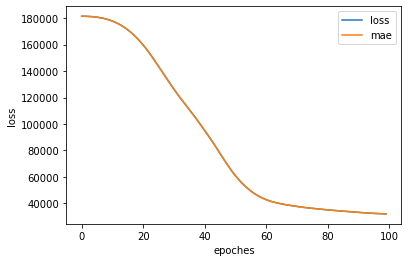

In [26]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoches')

In [27]:
from tensorflow.python.ops.init_ops_v2 import Initializer

# Set random seed
tf.random.set_seed(42)

# Creating a model 
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(20, activation = 'elu'),
                                tf.keras.layers.Dense(20, activation = 'elu'),
                                tf.keras.layers.Dense(1)
                             ])

# Compiling the model 

model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
              metrics = ['mae'])
# Fit the model

history = model_3.fit(X_train_normal,tf.squeeze(y_train), epochs = 100)

Epoch 1/100
37/37 [==============================] - 0s 2ms/step - loss: 181442.0312 - mae: 181442.0312
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 181441.6719 - mae: 181441.6719
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 181441.3594 - mae: 181441.3594
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 181441.0469 - mae: 181441.0469
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 181440.7188 - mae: 181440.7188
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 181440.3906 - mae: 181440.3906
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 181440.0625 - mae: 181440.0625
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 181439.6406 - mae: 181439.6406
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 181439.2812 - mae: 181439.2812
Epoch 10/100
37/37 [==============================] - 0s 1ms/ste

Epoch 80/100
37/37 [==============================] - 0s 1ms/step - loss: 27877.1328 - mae: 27877.1328
Epoch 81/100
37/37 [==============================] - 0s 1ms/step - loss: 28658.6641 - mae: 28658.6641
Epoch 82/100
37/37 [==============================] - 0s 1ms/step - loss: 28058.6211 - mae: 28058.6211
Epoch 83/100
37/37 [==============================] - 0s 994us/step - loss: 28499.3398 - mae: 28499.3398
Epoch 84/100
37/37 [==============================] - 0s 1ms/step - loss: 28034.2012 - mae: 28034.2012
Epoch 85/100
37/37 [==============================] - 0s 1ms/step - loss: 28231.8477 - mae: 28231.8477
Epoch 86/100
37/37 [==============================] - 0s 1ms/step - loss: 28463.4531 - mae: 28463.4531
Epoch 87/100
37/37 [==============================] - 0s 1ms/step - loss: 27748.8027 - mae: 27748.8027
Epoch 88/100
37/37 [==============================] - 0s 1ms/step - loss: 27942.8516 - mae: 27942.8516
Epoch 89/100
37/37 [==============================] - 0s 1ms/step - los

In [28]:
model_3.evaluate(X_test_normal, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 34519.3203 - mae: 34519.3203


[34519.3203125, 34519.3203125]

Text(0.5, 0, 'epoches')

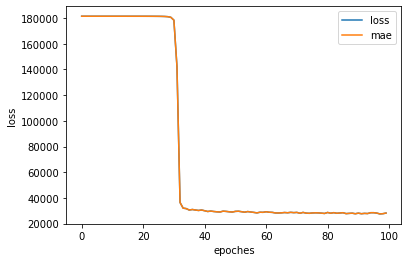

In [29]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoches')

## Random forest testing

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train_normal, tf.squeeze(y_train))

RandomForestRegressor(n_estimators=10, random_state=0)

In [35]:
y_pred = regressor.predict(X_test_normal)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[125130.   154500.  ]
 [409084.   325000.  ]
 [118520.   115000.  ]
 [132826.67 159000.  ]
 [255078.93 315500.  ]
 [107470.    75500.  ]
 [209350.   311500.  ]
 [142940.   146000.  ]
 [ 74320.    84500.  ]
 [135240.   135500.  ]
 [137733.33 145000.  ]
 [130430.   130000.  ]
 [135200.    81000.  ]
 [265193.33 214000.  ]
 [173775.   181000.  ]
 [141994.95 134500.  ]
 [195509.93 183500.  ]
 [163419.17 135000.  ]
 [110338.33 118400.  ]
 [228503.43 226000.  ]
 [131825.83 155000.  ]
 [243115.25 210000.  ]
 [206491.41 173500.  ]
 [131665.   129000.  ]
 [228503.43 192000.  ]
 [171320.   153900.  ]
 [182491.6  181134.  ]
 [145089.1  141000.  ]
 [213642.   181000.  ]
 [165738.5  208900.  ]
 [219713.89 127000.  ]
 [297423.33 284000.  ]
 [146455.   200500.  ]
 [134190.   135750.  ]
 [248238.57 255000.  ]
 [135099.53 140000.  ]
 [134053.83 138000.  ]
 [221236.58 219500.  ]
 [296916.67 310000.  ]
 [134990.    97000.  ]
 [139228.03 114500.  ]
 [214230.   205000.  ]
 [134622.08 119500.  ]
 [349950.38

In [38]:
MSE = np.square(np.subtract(y_test,y_pred)).mean()
MSE

2417333585.1860847

In [40]:
from sklearn.metrics import mean_absolute_error as mae
MAE = mae(y_test, y_pred)
MAE

32431.964322307595